In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Imports complete")

Imports complete


In [4]:
tidy2 = pd.read_csv('Tidy2 - Post - Changes in Number of Dwellings Per Street - Sheet1.csv', index_col = "Year")
tidy2 = tidy2[['Street', 'Number of Entities', 'Number of Vacant', 'Type']] #removing comments from adjacent fifth column
tidy2.head(20)
print("Task #1 complete")

Task #1 complete


Task #2 complete


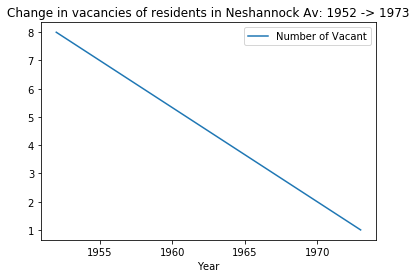

In [5]:
#GOAL: Plot change in entities and change in vancancies for Neshannock Avenue from 1952 to 1973
plt.figure()
plt.title("Change in number of residents in Neshannock Av: 1952 -> 1973")
sns.lineplot(data=tidy2.iloc[[345, 952], [1]]) #(245 -> 3)
plt.figure()
plt.title("Change in vacancies of residents in Neshannock Av: 1952 -> 1973")
sns.lineplot(data=tidy2.iloc[[345, 952], [2]]) #(8 -> 1)
#Shows the significance of New Castle Urban Renewal because the vacancies decreased by only 7 but the number of residents decreased by 242
#So at least 242 residents were displaced
print("Task #2 complete")

Task #3 complete


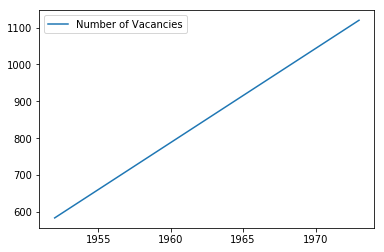

In [6]:
#GOAL: Show the average net change in entities and net change in vacancies from all streets between 1952 and 1973 (two years plotted)
sumEntity52 = tidy2.iloc[0:544, [1]].sum()
sumEntity73 = tidy2.iloc[544:, [1]].sum()
d1 = {'Number of Entities':[sumEntity52.iloc[0], sumEntity73.iloc[0]]}
sumEntity = pd.DataFrame(data=d1, index=[1952, 1973])
#print(sumEntity)
plt.figure()
sns.lineplot(data=sumEntity)
vacEntity52 = tidy2.iloc[0:544, [2]].sum()
vacEntity73 = tidy2.iloc[544:, [2]].sum()
d2 = {'Number of Vacancies':[vacEntity52.iloc[0], vacEntity73.iloc[0]]}
vacEntity = pd.DataFrame(data=d2, index=[1952, 1973])
#print(sumEntity)
plt.figure()
sns.lineplot(data=vacEntity)
print("Task #3 complete")

In [7]:
#GOAL: Combine streets that have the EXACT street name (i.e Washnington (East) and Washington (West) are treated as separate streets still)
# and then export the new dataset in a csv file
def equal_rows(row1, row2, col_name): #ex: col_name="Street", so check if both rows have the same value for "Street" column
    return row1[col_name] == row2[col_name] #because rows become series with the index being the column names

tidy2combined = pd.DataFrame()
numIterations = tidy2['Street'].size #number of streets in 1952 and 1973
i = 0

while i < numIterations:
    j = i #technically, don't need this but easier to interpret code
    
    streetName = tidy2.iloc[j]['Street'] #get values from current street
    numEntities = tidy2.iloc[j]['Number of Entities']
    numVacancies = tidy2.iloc[j]['Number of Vacant']
    residType = tidy2.iloc[j]['Type']
    
    equalRowsFound = False
    currRow = tidy2.iloc[j]
    
    while (j+1 != numIterations) and equal_rows(currRow, tidy2.iloc[j+1], 'Street'): #if adjacent rows have the same street name -> combine them
        equalRowsFound = True
        
        numEntities += tidy2.iloc[j+1]['Number of Entities'] #sum up the entities and vacancies since the streets are being combined
        numVacancies += tidy2.iloc[j+1]['Number of Vacant']

        if residType == 'Mixed' or tidy2.iloc[j+1]['Type'] == 'Mixed': #rules for combined street if currently separate streets with same name have different resident types
            residType = 'Mixed'
        elif residType == 'Residential' and tidy2.iloc[j+1]['Type'] == 'Non-Residential':
            residType = 'Mixed'
        elif residType == 'Non-Residential' and tidy2.iloc[j+1]['Type'] == 'Residential':
            residType = 'Mixed'
        elif residType == 'NA':
            residType = tidy2.iloc[j+1]['Type']
        elif tidy2.iloc[j+1]['Type'] == 'NA':
            pass #don't change residType then

        currRow = tidy2.iloc[j+1] #move to next row
        j+=1
        i+=1 #since we are going through multiple rows in this nested while loop, i needs to keep up

    df = pd.DataFrame(data={'Street':[streetName], 'Number of Entities':[numEntities], 'Number of Vacant':[numVacancies], 'Type':[residType]})
    tidy2combined=tidy2combined.append(df, ignore_index=True)
    
    i+=1 #we don't want i to stay on the same row (i needs to be incremented again even if nested while loop is executed to prevent this from happening)

print(tidy2combined)
tidy2combined.to_csv('tidy2combined.csv', index=False) #export dataset
print("Task #4 complete")                                            

                     Street  Number of Entities  Number of Vacant  \
0                     Acorn                   9                 0   
1                     Adams                 110                 1   
2                     Addis                  23                 3   
3                    Adella                   1                 0   
4                     Agnew                  30                 0   
5                    Albert                  44                 0   
6                 Alborn Av                  21                 2   
7          Alborn Mill Road                   0                 0   
8              Allegheny Av                  27                 2   
9                     Allen                  30                 0   
10                   Almira                  14                 0   
11           Alvaretta Blvd                   6                 3   
12                   Andrew                   4                 0   
13                      Ann       

In [21]:
"""
tidy2combined = pd.read_csv('tidy2combined.csv')

def equal_rows(row1, row2, col_name): #ex: col_name="Street", so check if both rows have the same value for "Street" column
    return row1[col_name] == row2[col_name] #because rows become series with the index being the column names

North_1952 = tidy2combined.loc[tidy2combined['Street'] == 'North']
North_1973 = tidy2combined.loc[tidy2combined['Street'] == 'North ']

display(North_1952)
print(len(North_1952['Street']))
display(North_1973)
print(len(North_1973['Street']))
"""


Street  Number of Entities  Number of Vacant   Type
937  North                 151                20  Mixed

1


Street  Number of Entities  Number of Vacant   Type
344  North                  275                 9  Mixed

1


In [8]:
#PART 1: Top 5 affected streets (in terms of most residents lost) --> implies that the street must of existed both in 1952 and 1973
#GOAL: Find streets that existed both in 1952 AND 1973 and export them
#Note: this uses the dataset where we combined streets that had the exact same name AND we are only looking at change in entities
#Note: this uses the dataset that combined East and West streets

tidy2combined = pd.read_csv('tidy2combined.csv')
print(tidy2combined.head())
print('size:', tidy2combined['Street'].size)

#USE THIS IF COMBINED
entity52i=tidy2combined.iloc[0:531, [0,1]] # these are the streets from 1952; Note that there are 1,157 entries in tidy2combined (1952 and 1973 combined)
entity73f=tidy2combined.iloc[531:, [0,1]] # these are the streets from 1973

print('entity52i', entity52i, sep='\n')
print('entity73f', entity73f, sep='\n')

def equal_rows(row1, row2, col_name): #ex: col_name="Street", so check if both rows have the same value for "Street" column
    return row1[col_name] == row2[col_name] #because rows become series with the index being the column names

def series_to_dataframe(s): #takes a Series object and turns it into a DataFrame object
    return pd.DataFrame(data={'Street': [s['Street']], 'Number of Entities': [s['Number of Entities']]})

unchangedStreets1952 = pd.DataFrame()
unchangedStreets1973 = pd.DataFrame()
col_name = 'Street'
for i in range(entity52i[col_name].size):
    print('i: ' + str(i)) #show the iterations (it takes a LONG time)
    k = i
    
    for j in range(k, entity73f[col_name].size): #so where ever i starts is also where j starts (for each iteration of i)
        if equal_rows(entity52i.iloc[i, [0,1]], entity73f.iloc[j, [0,1]], 'Street'): #***if both streets have the same name than they must of existed i 1952 and 1973 since all duplicate, consecutive streets from 1952 and 1973 were combined in previous cell***
            unchangedStreets1952=unchangedStreets1952.append(series_to_dataframe(entity52i.iloc[i, [0,1]]), ignore_index=True)
            unchangedStreets1973=unchangedStreets1973.append(series_to_dataframe(entity73f.iloc[j, [0,1]]), ignore_index=True)

print('unchangedStreets1952', unchangedStreets1952, sep='\n')
print('unchangedStreets1973', unchangedStreets1973, sep='\n')

#USE THIS IF COMBINED
#unchangedStreets1952.to_csv('unchangedStreets1952_combined.csv', index=False)
#both these datasets are the EXACT same in terms of streets
#unchangedStreets1973.to_csv('unchangedStreets1973_combined.csv', index=False)

#BUT different in terms of YEAR
print("Task #5 complete")

   Street  Number of Entities  Number of Vacant         Type
0   Acorn                   9                 0  Residential
1   Adams                 110                 1        Mixed
2   Addis                  23                 3  Residential
3  Adella                   1                 0  Residential
4   Agnew                  30                 0  Residential
size: 1157
entity52i
                    Street  Number of Entities
0                    Acorn                   9
1                    Adams                 110
2                    Addis                  23
3                   Adella                   1
4                    Agnew                  30
5                   Albert                  44
6                Alborn Av                  21
7         Alborn Mill Road                   0
8             Allegheny Av                  27
9                    Allen                  30
10                  Almira                  14
11          Alvaretta Blvd                   6
12

i: 282
i: 283
i: 284
i: 285
i: 286
i: 287
i: 288
i: 289
i: 290
i: 291
i: 292
i: 293
i: 294
i: 295
i: 296
i: 297
i: 298
i: 299
i: 300
i: 301
i: 302
i: 303
i: 304
i: 305
i: 306
i: 307
i: 308
i: 309
i: 310
i: 311
i: 312
i: 313
i: 314
i: 315
i: 316
i: 317
i: 318
i: 319
i: 320
i: 321
i: 322
i: 323
i: 324
i: 325
i: 326
i: 327
i: 328
i: 329
i: 330
i: 331
i: 332
i: 333
i: 334
i: 335
i: 336
i: 337
i: 338
i: 339
i: 340
i: 341
i: 342
i: 343
i: 344
i: 345
i: 346
i: 347
i: 348
i: 349
i: 350
i: 351
i: 352
i: 353
i: 354
i: 355
i: 356
i: 357
i: 358
i: 359
i: 360
i: 361
i: 362
i: 363
i: 364
i: 365
i: 366
i: 367
i: 368
i: 369
i: 370
i: 371
i: 372
i: 373
i: 374
i: 375
i: 376
i: 377
i: 378
i: 379
i: 380
i: 381
i: 382
i: 383
i: 384
i: 385
i: 386
i: 387
i: 388
i: 389
i: 390
i: 391
i: 392
i: 393
i: 394
i: 395
i: 396
i: 397
i: 398
i: 399
i: 400
i: 401
i: 402
i: 403
i: 404
i: 405
i: 406
i: 407
i: 408
i: 409
i: 410
i: 411
i: 412
i: 413
i: 414
i: 415
i: 416
i: 417
i: 418
i: 419
i: 420
i: 421
i: 422
i: 423
i: 424

In [9]:
#PART 2: Top 5 affected streets (in terms of most residents lost) --> implies subtracting 1952 entities from corresponding 1973 entities
#GOAL: Calculate the differences in entities between 1973 and 1952 and put it in as a DataFrame object
#USE THIS IF COMBINED

unchangedStreets1952 = pd.read_csv('unchangedStreets1952_combined.csv')
unchangedStreets1973 = pd.read_csv('unchangedStreets1973_combined.csv')
#print(unchangedStreets1952.head())
#print(unchangedStreets1973.head())

unchangedStreetsDiff = unchangedStreets1973['Number of Entities'].subtract(unchangedStreets1952['Number of Entities']) #Subtract the streets (which creates a Series object)
unchangedStreetsDiff = pd.concat([unchangedStreets1952['Street'], unchangedStreetsDiff], axis=1) #DataFrame (now holds street names corresponding to differences)
unchangedStreetsDiff.rename(columns={'Number of Entities':'Change in Entities'}, inplace=True)
#print(unchangedStreetsDiff.head())

unchangedStreetsDiff.sort_values(by='Change in Entities', inplace=True)

#************ANSWER BELOW*****************
print(unchangedStreetsDiff.head()) #Top 5 affected streets (in terms of most residents lost)
unchangedStreetsDiff.reset_index()
print(unchangedStreetsDiff)

print("Task #6 complete")

                Street  Change in Entities
448         Washington                -309
308      Neshannock Av                -242
221  Jefferson (South)                -173
100          Croton Av                -100
250            Long Av                 -77
                   Street  Change in Entities
448            Washington                -309
308         Neshannock Av                -242
221     Jefferson (South)                -173
100             Croton Av                -100
250               Long Av                 -77
280        Mercer (North)                 -51
297               Moravia                 -48
286          Mill (South)                 -46
285          Mill (North)                 -41
335               Pearson                 -38
117                  East                 -38
143                 Falls                 -31
353                 Quest                 -30
403                 South                 -29
74          Cedar (North)                 -24
244   

                      Change in Entities
Street                                  
Washington                          -309
Neshannock Av                       -242
Jefferson (South)                   -173
Croton Av                           -100
Long Av                              -77
Mercer (North)                       -51
Moravia                              -48
Mill (South)                         -46
Mill (North)                         -41
Pearson                              -38
East                                 -38
Falls                                -31
Quest                                -30
South                                -29
Cedar (North)                        -24
Liberty (North)                      -24
Wallace Av                           -23
Court                                -23
Beaver (South)                       -22
Scioto                               -21
Mercer (South)                       -21
Reynolds                             -21
Mahoning Av     

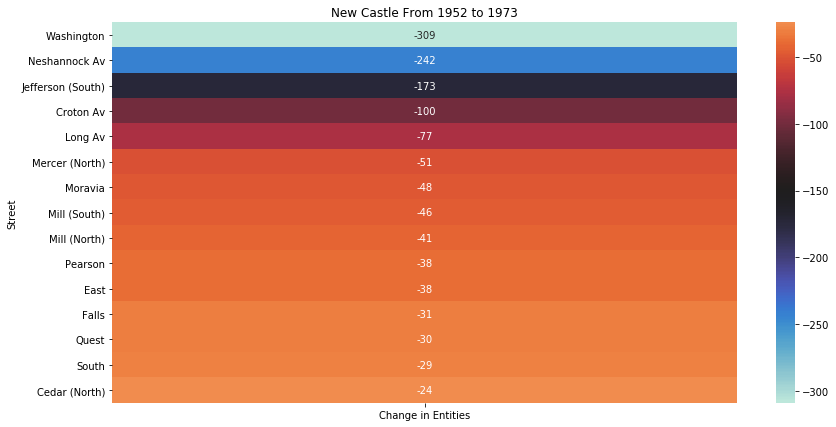

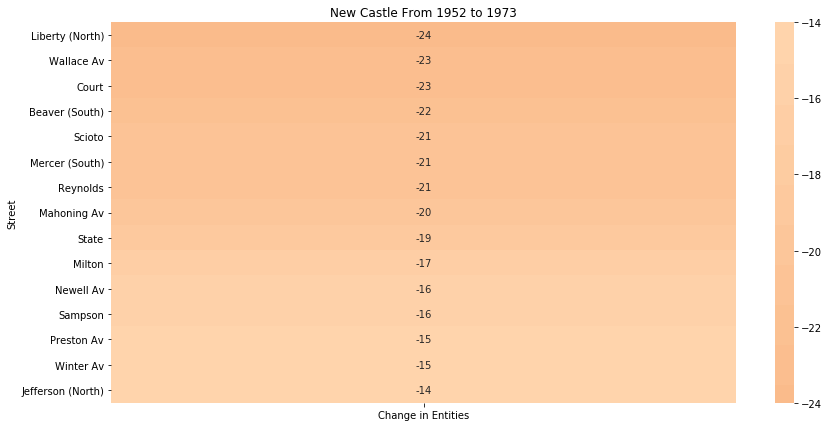

In [10]:
#GOAL: Define heatmap function that can partition a dataset given ranges of rows
#Heat Map - Organized from Most affected to least affected
#NEEDS ABOVE CELL TO WORK

unchangedStreetsDiff_indexChanged=unchangedStreetsDiff.set_index('Street')
print(unchangedStreetsDiff_indexChanged)
print(unchangedStreetsDiff_indexChanged['Change in Entities'])

def partitionHeatMaps(data, size, title, xlabel, interval):
    """
    interval ex: [100, 200, 400] -> data[100:200], data[200:400]
    """
    
    for i in range(len(interval) - 1): #creates a heatmap for each partition that it was given
        plt.figure(figsize=(size[0], size[1]))
        plt.title(title)
        df = data.iloc[interval[i]:interval[i+1]]
        sns.heatmap(data=df, annot=True, fmt='d', center=-150)

partitionHeatMaps(unchangedStreetsDiff_indexChanged, (14,7), "New Castle From 1952 to 1973", "Change in Entities", [0, 15, 30])

print("Task #7 complete")

In [11]:
#GOAL: Manually add Washington (East) and Washington (West) change in entities because we are not treating them anymore as the same street
# And remove the previous combined Washington street's change in entities
#Unsplit Washington street to Washington (East) and Washington (West)
#Washington (East) 1952: 898
#Washington (West) 1952: 375
#Washington (East) 1973: 726
#Washington (West) 1973: 238
#Washington (East) Difference: -172
#washington (West) Difference: -137

unchangedStreetsDiff_indexChanged_WashingtonSplit = unchangedStreetsDiff_indexChanged
data = []
data.insert(0, {'Street': 'Washington (East)', 'Change in Entities': -172})
data.insert(0, {'Street': 'Washington (West)', 'Change in Entities': -137})
d = pd.DataFrame(data)
d=d.set_index('Street')
print(d.head())

#Below can be executed once, otherwise it will try to remove Washington when it has already been removed, which will cause an error. To execute this again execute cell above this one
unchangedStreetsDiff_indexChanged_WashingtonSplit.drop(index='Washington', axis=0, inplace=True) #Get rid of combined Washington street
print(unchangedStreetsDiff_indexChanged_WashingtonSplit.head())

unchangedStreetsDiff_indexChanged_WashingtonSplit = pd.concat([d, unchangedStreetsDiff_indexChanged_WashingtonSplit], ignore_index=False) #add Washington East and West differences
unchangedStreetsDiff_indexChanged_WashingtonSplit.sort_values(by='Change in Entities', inplace=True) #sort again
print(unchangedStreetsDiff_indexChanged_WashingtonSplit.head())

print("Task #8 complete")

                   Change in Entities
Street                               
Washington (West)                -137
Washington (East)                -172
                   Change in Entities
Street                               
Neshannock Av                    -242
Jefferson (South)                -173
Croton Av                        -100
Long Av                           -77
Mercer (North)                    -51
                   Change in Entities
Street                               
Neshannock Av                    -242
Jefferson (South)                -173
Washington (East)                -172
Washington (West)                -137
Croton Av                        -100
Task #8 complete


Change in Entities
Street                               
Neshannock Av                    -242
Jefferson (South)                -173
Washington (East)                -172
Washington (West)                -137
Croton Av                        -100

Task #9 complete


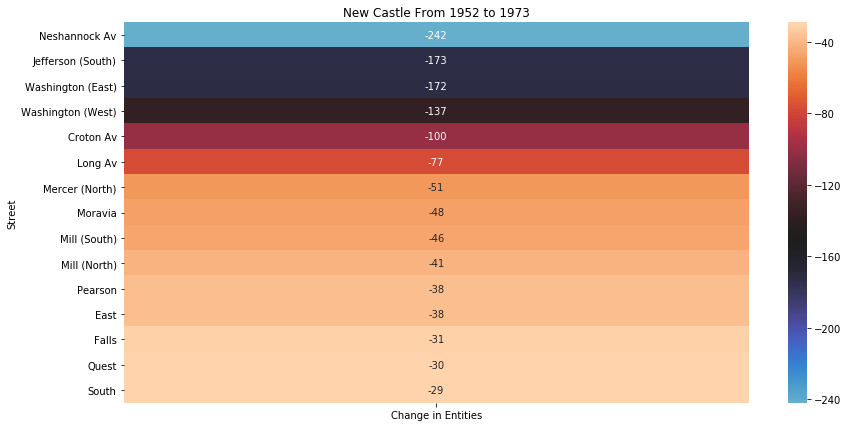

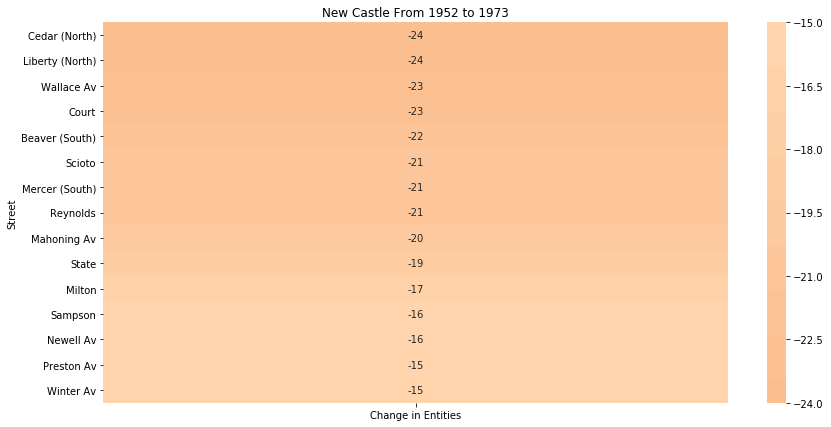

In [12]:
#GOAL: display new heat map after above's cell modification

display(unchangedStreetsDiff_indexChanged_WashingtonSplit.head())

partitionHeatMaps(unchangedStreetsDiff_indexChanged_WashingtonSplit, (14,7), "New Castle From 1952 to 1973", "Change in Entities", [0, 15, 30])
print("Task #9 complete")

In [17]:
#GOAL: Manually add Washington (East) and Washington (West) change in entities because we are not treating them anymore as the same street
# And remove the previous combined Washington street's change in entities
#Unsplit Washington street to Washington (East) and Washington (West)
#Washington (East) 1952: 898
#Washington (West) 1952: 375
#Washington (East) 1973: 726
#Washington (West) 1973: 238

unchangedStreets1952_indexChanged_WashingtonSplit = pd.read_csv('unchangedStreets1952_combined.csv')
unchangedStreets1973_indexChanged_WashingtonSplit = pd.read_csv('unchangedStreets1973_combined.csv')
unchangedStreets1952_indexChanged_WashingtonSplit.set_index('Street', inplace=True)
unchangedStreets1973_indexChanged_WashingtonSplit.set_index('Street', inplace=True)
#print(unchangedStreets1952_indexChanged_WashingtonSplit.index)

#----------------------------------------------------1952----------------------------------------------------------------------

data1952 = []
data1952.insert(0, {'Street': 'Washington (East)', 'Number of Entities': 898})
data1952.insert(0, {'Street': 'Washington (West)', 'Number of Entities': 375})
d52 = pd.DataFrame(data1952)
d52=d52.set_index('Street')
#print(d52.head())
#Below can be executed once, otherwise it will try to remove Washington when it has already been removed, which will cause an error. To execute this again execute cell above this one

unchangedStreets1952_indexChanged_WashingtonSplit.drop(index='Washington', axis=0, inplace=True) #Get rid of combined Washington street
#print(unchangedStreets1952_indexChanged_WashingtonSplit.tail(34))

unchangedStreets1952_indexChanged_WashingtonSplit = pd.concat([d52, unchangedStreets1952_indexChanged_WashingtonSplit], ignore_index=False) #add Washington East and West
unchangedStreets1952_indexChanged_WashingtonSplit.sort_values(by='Street', inplace=True) #sort again
print(unchangedStreets1952_indexChanged_WashingtonSplit.tail(35))

#unchangedStreets1952_indexChanged_WashingtonSplit.to_csv('unchangedStreets1952_indexChanged_WashingtonSplit.csv', index=True)

#----------------------------------------------------1973----------------------------------------------------------------------

data1973 = []
data1973.insert(0, {'Street': 'Washington (East)', 'Number of Entities': 726})
data1973.insert(0, {'Street': 'Washington (West)', 'Number of Entities': 238})
d73 = pd.DataFrame(data1973)
d73=d73.set_index('Street')
#print(d73.head())
#Below can be executed once, otherwise it will try to remove Washington when it has already been removed, which will cause an error. To execute this again execute cell above this one

unchangedStreets1973_indexChanged_WashingtonSplit.drop(index='Washington', axis=0, inplace=True) #Get rid of combined Washington street
#print(unchangedStreets1973_indexChanged_WashingtonSplit.tail(34))

unchangedStreets1973_indexChanged_WashingtonSplit = pd.concat([d73, unchangedStreets1973_indexChanged_WashingtonSplit], ignore_index=False) #add Washington East and West
unchangedStreets1973_indexChanged_WashingtonSplit.sort_values(by='Street', inplace=True) #sort again
print(unchangedStreets1973_indexChanged_WashingtonSplit.tail(35))

#unchangedStreets1973_indexChanged_WashingtonSplit.to_csv('unchangedStreets1973_indexChanged_WashingtonSplit.csv', index=True)

print("Task #10 complete")

                       Number of Entities
Street                                   
Washington (East)                     898
Washington (West)                     375
Water                                   6
Wayne (North)                          15
Wayne (South)                          18
Weaver                                 12
Weinberg                                3
Wellsley                                2
West Av                                 5
West Park Way                          17
West Pittsburgh Road                    0
Whippo                                 21
White                                   4
Whitney Av                              0
Wick                                   10
Wildwood Av                            24
Willard Av                              5
Williams                               32
Willowbrook Road                       31
Wilmington Av                         276
Wilson Av                              58
Wilson Road                       

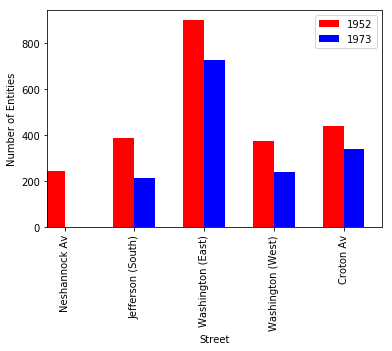

Task #11 complete


In [20]:
#GOAL: display side-by-side bar charts showing the change between 1952 and 1973 of the top 5 affected streets

#unchangedStreets1952_indexChanged_WashingtonSplit = pd.read_csv('unchangedStreets1952_indexChanged_WashingtonSplit.csv')
#unchangedStreets1973_indexChanged_WashingtonSplit = pd.read_csv('unchangedStreets1973_indexChanged_WashingtonSplit.csv')
unchangedStreets1952_indexChanged_WashingtonSplit.rename(columns={"Number of Entities": "Number of Entities in 1952"}, inplace=True)
unchangedStreets1973_indexChanged_WashingtonSplit.rename(columns={"Number of Entities": "Number of Entities in 1973"}, inplace=True)

#display(unchangedStreets1952_indexChanged_WashingtonSplit)
#display(unchangedStreets1973_indexChanged_WashingtonSplit)
#columns: Street, 1952, 1973

unchangedStreets_indexChanged_WashingtonSplit = unchangedStreets1952_indexChanged_WashingtonSplit.merge(unchangedStreets1973_indexChanged_WashingtonSplit, on='Street')
#print(unchangedStreets_indexChanged_WashingtonSplit.index)
#unchangedStreets_indexChanged_WashingtonSplit.set_index('Street', inplace=True)

#top 5: Neshannock Av, Jefferson (South), Washington (East), Washington (West), Croton Av
df = unchangedStreets_indexChanged_WashingtonSplit.iloc[[308, 221, 448, 449, 100]]

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.3
df['Number of Entities in 1952'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df['Number of Entities in 1973'].plot(kind='bar', color='blue', ax=ax, width=width, position=0)
ax.set_ylabel('Number of Entities')
plt.legend(['1952', '1973'])
plt.show()

print("Task #11 complete")